Initial Data:

     team      country  year  events  athletes   age  height  weight  \
0     AFG  Afghanistan  1964       8         8  22.0   161.0    64.2   
1     AFG  Afghanistan  1968       5         5  23.2   170.2    70.0   
2     AFG  Afghanistan  1972       8         8  29.0   168.3    63.8   
3     AFG  Afghanistan  1980      11        11  23.6   168.4    63.2   
4     AFG  Afghanistan  2004       5         5  18.6   170.8    64.8   
...   ...          ...   ...     ...       ...   ...     ...     ...   
2139  ZIM     Zimbabwe  2000      19        26  25.0   179.0    71.1   
2140  ZIM     Zimbabwe  2004      11        14  25.1   177.8    70.5   
2141  ZIM     Zimbabwe  2008      15        16  26.1   171.9    63.7   
2142  ZIM     Zimbabwe  2012       8         9  27.3   174.4    65.2   
2143  ZIM     Zimbabwe  2016      13        31  27.5   167.8    62.2   

      prev_medals  medals  
0             0.0       0  
1             0.0       0  
2             0.0       0  
3       

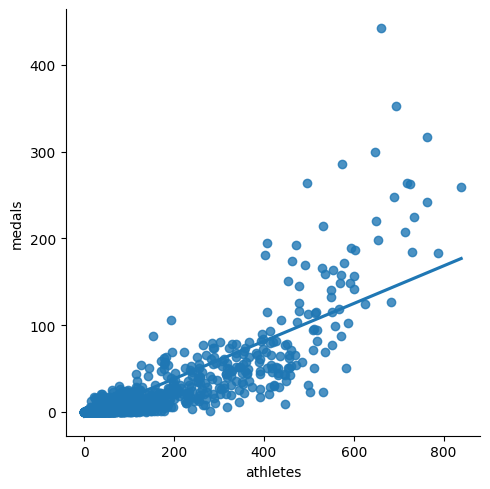

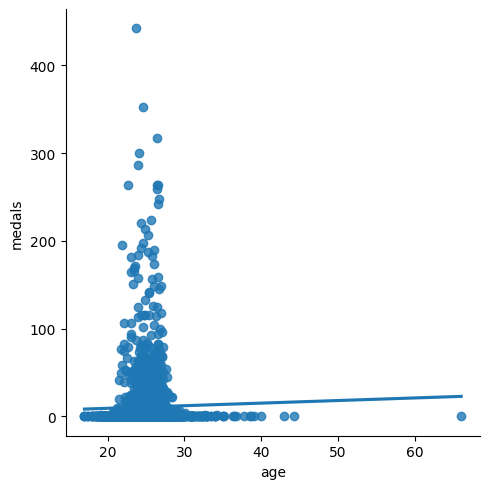

In [152]:
import pandas as pd
import seaborn as sns


#Reading and printing files 
teams = pd.read_csv("teams.csv")
teams = teams[["team", "country", "year", "events", "athletes", "age", "height", "weight", "prev_medals", "medals"]]
print("Initial Data:\n")
print(teams)


# Calculate correlation
correlation = teams.corr(numeric_only=True)["medals"]
print("\nThese are some correlations between the medals and other columns from the table\n")
print(correlation)


# Plotting
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)


# Data Cleaning (removing null values)
missing_values = teams[teams.isnull().any(axis=1)]
teams = teams.dropna()


# Split the data (into Train and Test dataset)
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [153]:
train.shape

(1609, 10)

In [154]:
test.shape

(405, 10)

In [155]:
# Training Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predictors = ["athletes", "medals"]
targets = "medals"

reg.fit(train[predictors], train["medals"])

LinearRegression()

In [156]:
predictions = reg.predict(test[predictors])

In [157]:
test["predictions"] = predictions

In [158]:
test.loc[test["predictions"] < 0 , "predictions"] = 0 

In [159]:
test["predictions"] = test["predictions"].round()

In [160]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"] , test["predictions"])

In [161]:
error

0.0

In [162]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [163]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,prev_medals,medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,317.0,248,248.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,248.0,264,264.0


In [164]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,age,height,weight,prev_medals,medals,predictions
907,IND,India,2012,55,95,26.0,174.2,72.7,3.0,6,6.0
908,IND,India,2016,67,130,26.1,170.0,66.3,6.0,2,2.0


In [165]:
errors  = (test["medals"] - test["predictions"]).abs()

In [166]:
errors

6       0.0
7       0.0
24      0.0
25      0.0
37      0.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    0.0
2143    0.0
Length: 405, dtype: float64

In [167]:
errors_by_team = errors.groupby(test["team"]).mean()

In [168]:
errors_by_team

team
AFG    0.0
ALB    0.0
ALG    0.0
AND    0.0
ANG    0.0
      ... 
VIE    0.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Length: 204, dtype: float64

In [169]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [170]:
error_ratio = errors_by_team / medals_by_team

In [171]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    0.0
ALG    0.0
ARG    0.0
ARM    0.0
AUS    0.0
      ... 
UKR    0.0
USA    0.0
UZB    0.0
VEN    0.0
VIE    0.0
Length: 97, dtype: float64

In [172]:
import numpy as np 
error_ratio  = error_ratio[np.isfinite(error_ratio)]

In [173]:
error_ratio

team
AFG    0.0
ALG    0.0
ARG    0.0
ARM    0.0
AUS    0.0
      ... 
UKR    0.0
USA    0.0
UZB    0.0
VEN    0.0
VIE    0.0
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

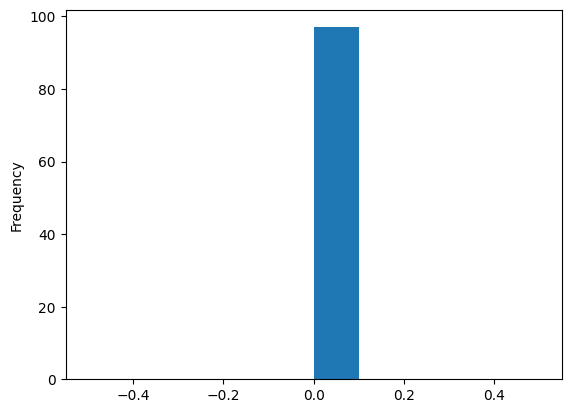

In [174]:
error_ratio.plot.hist()

In [175]:
error_ratio.sort_values()

team
AFG    0.0
PHI    0.0
NZL    0.0
NOR    0.0
NIG    0.0
      ... 
EST    0.0
ESP    0.0
EGY    0.0
ITA    0.0
VIE    0.0
Length: 97, dtype: float64